# Titanic: Machine Learning from desaster

<ul>
    <li><a href="#introduction">I - Introduction</a></li>
    <li><a href="#data_analysis">II - Data analysis</a></li>
    <ul>
        <li><a href="#loading_datas">1. Loading Datas</a></li>
        <li><a href="#missing_datas">2. Missing Datas</a></li>
        <ul>
            <li><a href="#general_overview">2.1 General overview</a></li>
            <li><a href="#age">2.2 Age</a></li>
            <li><a href="#embarked">2.3 Embarked</a></li>
        </ul>
        <li><a href="#feature_engineering">3. Feature Engineering</a></li>
        <ul>
            <li><a href="#name">3.1 Convert the name</a></li>
            <li><a href="#family_size">3.2 Family size</a></li>
            <li><a href="#object_features">3.3 Object features</a></li>
        </ul>
        <li><a href="#corr">4. Most Important Feature</a></li>
    </ul>
    <li><a href="#decision_tree">III - Decision Tree Algorithm</a></li>
    <ul>
        <li><a href="#cleaning">1. Last Cleaning</a></li>
        <li><a href="#split">2. Split Train/Test</a></li>
        <li><a href="#first_model">3. First Rough Model</a></li>
        <li><a href="#tuning">4. Tuning the Algorithm</a></li>
    </ul>
    <li><a href="#conclusion">IV - Conclusion</a></li>
</ul>

# I-  Introduction<a id="introduction"></a>

### Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not.<br> 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

### Submission File Format

<p style="text-align:justify;">You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.</p>

The file should have exactly 2 columns:
<ul>
    <li>PassengerId (sorted in any order)</li>
    <li>Survived (contains your binary predictions: 1 for survived, 0 for deceased)</li>
</ul>
<div class="alert alert-info">
PassengerId,Survived<br>
&nbsp;892,0<br>
&nbsp;893,1<br>
&nbsp;894,0<br>
&nbsp;Etc.
</div>        

# II - Data Analysis<a id="data_analysis"></a>

## 1. Loading Datas<a id="loading_datas"></a>

First I import the libraries necessary for data analysis.
<ul>
    <li><u>Pandas:</u> It is a very usefull library for machine learning. It provides very powerfull datastructures and data analysis tools for Python.</li>
    <li><p style="text-align:justify;"><u>Matplotlib & Seaborn:</u> I use these two libraries in combination so I can display interesting graphs to show correlations amoung the different features. Matplotlib and seaborn offer a great diversity of graphs and are very oftenly used in Python projects.</p></li>
</ul>

<p style="text-align:justify;">After importing the libraries, I used pandas to load the traininng (train_df) and test (test_df) datasets. df stands for dataframe which is the format used by the pandas library to manipulate datas. I then created two other variables combining the training and test datasets. I will use full_datas to quickly make modifications on both datasets at the same time during pre-processing. full_datas_df will be used for quick data visualisation as it still is a dataframe.</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

import scipy.stats as st

In [3]:
train_df = pd.read_csv("datas/train.csv")
test_df = pd.read_csv("datas/test.csv")

In [4]:
display(train_df.head())
print("The shape of the train dataset is {}".format(train_df.shape))
print("The shape of the test datasset is {}".format(test_df.shape))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The shape of the train dataset is (891, 12)
The shape of the test datasset is (418, 11)


<p style="text-align:justify;">The train dataset contains 891 passengers, the test dataset contains 418 passengers. We have access to 11 features to predict weither the passenger is going to survive or not. The train dataset also contains the label of the data: "Survived". This feature can either be 0 for died or 1 for survived.</p>

By looking at the Kaggle website, we get a description of each feature.

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<p style="text-align:justify;">I decided to drop the PassengerId, because I am sure that including this feature will only reduce the performances of the classification algorithm. I also dropped the Ticket feature as the pre-processing for this feature seems too hard for the importance it has.</p>

In [5]:
train_df.drop(["PassengerId", "Ticket"], axis=1, inplace=True)
test_df.drop(["PassengerId", "Ticket"], axis=1, inplace=True)

## 2. Missing Datas<a id="missing_datas"></a>

### 2.1 General overview<a id="general_overview"></a>

Let's see how many missing datas there are in our datasets. The following table displays the percentage of missing datas for each features.

In [6]:
missing_train = train_df.isnull().sum()/len(train_df)*100
missing_test = test_df.isnull().sum()/len(train_df)*100

missings = pd.concat([missing_train, missing_test], axis=1, keys=["Train missing", "Test missing"]).sort_values("Train missing", ascending=False)
fm = missings[missings.gt(0).any(axis=1)]
display(fm)
print("these {} features have missing datas.".format(len(fm)))

,Train missing,Test missing
Cabin,77.104377,36.700337
Age,19.865320,9.652076
Embarked,0.224467,0.000000
Fare,0.000000,0.112233


these 4 features have missing datas.


<p style="text-align:justify;">I then decided to drop the Cabin feature, because it has more than 20% of missing features. The age carries too much information to be dropped and the other features can be completed easily.</p>

In [7]:
for index in missing_train[missing_train>20].index:
    train_df.drop(index, axis=1, inplace=True)
    test_df.drop(index, axis=1, inplace=True)
    print("The {} feature was dropped because it does not carry enought information.".format(index))

The Cabin feature was dropped because it does not carry enought information.


Now let's analyse each feature with missing datas one by one.

### 2.2 Age<a id="age"></a>
Let's plot the number of passenger who survived and those who died according to their age.

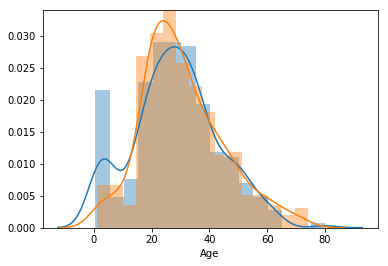

In [8]:
sns.distplot(train_df[train_df["Survived"] == 1]["Age"].dropna())
sns.distplot(train_df[train_df["Survived"] == 0]["Age"].dropna())
plt.show()

<p style="text-align:justify">From this graph, we can see that there is a very small correlation between the age of the passenger and its chances of survival. We will complete the Age feature but it does not carry a lot of valuable information.</p>

I used a random function to select ages wich are common ages for the dataset.

In [9]:
for dataset in (train_df, test_df):
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\roland\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 2.3 Embarked and Fare<a id="embarked"></a>
<p style="text-align:justify">There are only 2 missing datas for Embarked and 1 missing for Fare. I decided to use two different, but very simple technics to fill these missing datas. As it is a Numerical Continuous feature, I replaced the missing data of the fare by the median value for the train dataset. I replaced the two missing Embarked features with the top value for this feature.</p>

In [10]:
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].describe().top)
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].describe().top)

In [11]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median)

With a complete dataset to work with, I can now do some pre-processing.

## 3. Feature engineering<a id="feature_engineering"></a>

### 3.1 Convert the name<a id="name"></a>

<p style="text-align:justify">We can extract interesting informations from the name of the passengers. I decided to extract the title of each person using a RegEx expression. Right after doing that, I made a couple of scripts to see the repartition of this feature.</p>

In [12]:
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print("Percentage of the title in train dataset:")
print(test_df['Title'].value_counts()/test_df["Title"].count()*100)
print("\nPercentage of the title in test dataset:")
print(train_df['Title'].value_counts()/train_df["Title"].count()*100)

print("\nThis titles are present in train but not in test:")
print(set(train_df["Title"]) - set(test_df["Title"]))

Percentage of the title in train dataset:
Mr        57.416268
Miss      18.660287
Mrs       17.224880
Master     5.023923
Col        0.478469
Rev        0.478469
Dr         0.239234
Dona       0.239234
Ms         0.239234
Name: Title, dtype: float64

Percentage of the title in test dataset:
Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Major        0.224467
Mlle         0.224467
Col          0.224467
Lady         0.112233
Jonkheer     0.112233
Mme          0.112233
Don          0.112233
Sir          0.112233
Capt         0.112233
Countess     0.112233
Ms           0.112233
Name: Title, dtype: float64

This titles are present in train but not in test:
{'Sir', 'Don', 'Lady', 'Countess', 'Mlle', 'Mme', 'Major', 'Jonkheer', 'Capt'}


<p style="text-align:justify;">The information to get from this analysis is that all titles are not interesting for survival prediction. Indeed we can see that some of the titles present in the train dataset are not in the test dataset. Thus they are not usefull for the prediction. We also need to get rid of the titles which represent less than 10% of the dataset. The sample corresponding to these titles are not big enought to be significant.</p>

<p style="text-align:justify;">The simmilar titles are merged such as "Mlle" and "Miss". And all the titles that are not usefull are coombined into one single title: "Rare". Then we have no more information to extract from the name feature so I drop it.</p>

In [13]:
for dataset in (train_df, test_df):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset.drop(["Name"], axis=1, inplace=True)

Here are the final titles and there presence in the dataset in percentage.

In [14]:
title_df = pd.concat([train_df, test_df])
title_df["Title"].value_counts()

Mr      757
Miss    264
Mrs     198
Rare     90
Name: Title, dtype: int64

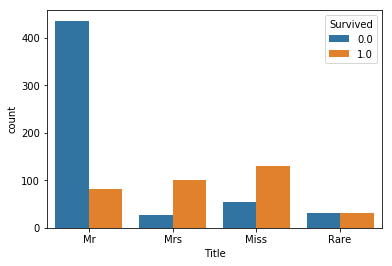

In [60]:
sns.countplot(x="Title", data=title_df, hue="Survived")
plt.show()

### 3.2 Family sizes<a id="family_size"></a>

Let's build a new feature using both SibSp and Parch and create a number which represents the number of members in the families of each passenger.

In [15]:
train_df["Family_size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["Family_size"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size
0,3,male,34,0,0,7.8292,Q,Mr,1
1,3,female,47,1,0,7,S,Mrs,2
2,2,male,62,0,0,9.6875,Q,Mr,1
3,3,male,27,0,0,8.6625,S,Mr,1
4,3,female,22,1,1,12.2875,S,Mrs,3


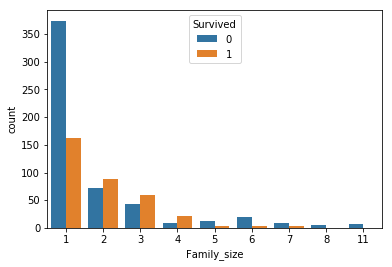

In [16]:
sns.countplot(x = "Family_size", hue = "Survived", data=train_df)
plt.show()

<p style="text-align:justify;">We can clearly see from the graph above that this feature as an impact on the chances of survival of the passengers. From this graph, I decided to create 3 bins of family sizes: </p>
<ul>
    <li>Family_size == 1</li>
    <li>Family_size > 1 && Family_size < 5</li>
    <li>Family_size > 4</li>
</ul>

In [17]:
for dataset in (train_df, test_df):
    dataset.loc[dataset['Family_size'] == 1, 'Family_size'] = 0
    dataset.loc[(dataset['Family_size'] > 1) & (dataset['Family_size'] < 5), 'Family_size'] = 1
    dataset.loc[dataset['Family_size'] > 4, 'Family_size'] = 2

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size
0,0,3,male,22,1,0,7.2500,S,Mr,1
1,1,1,female,38,1,0,71.2833,C,Mrs,1
2,1,3,female,26,0,0,7.9250,S,Miss,0
3,1,1,female,35,1,0,53.1000,S,Mrs,1
4,0,3,male,35,0,0,8.0500,S,Mr,0


### 3.3 Object features<a id="object_features"></a>
We need to convert the datas we now have to be able to feed them into a classification algorithm. Let's first take a look at the different types of data we have.

In [19]:
display(test_df.info())
obj_features = set([col for col in train_df.columns if train_df[col].dtype == "object"])
display(obj_features)
print("There are {} features to vonvert.".format(len(obj_features)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null object
Embarked       418 non-null object
Title          418 non-null object
Family_size    418 non-null int64
dtypes: int32(1), int64(4), object(4)
memory usage: 27.8+ KB


None

{'Embarked', 'Sex', 'Title'}

There are 3 features to vonvert.


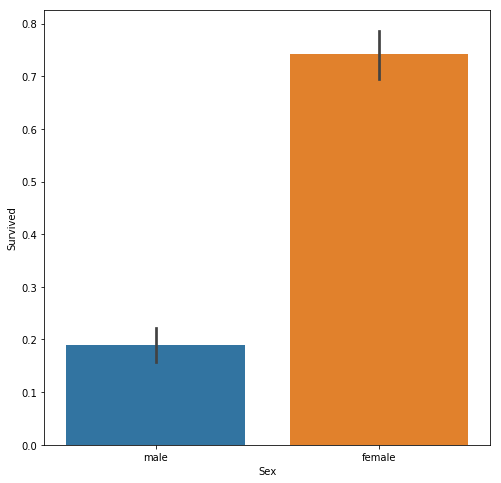

In [20]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.show()

<p style="text-align:justify;">We can see in this figure that you have better chances of survival when you are a female than a male. Thus this feature is ordinal and can be converted as follow.</p>

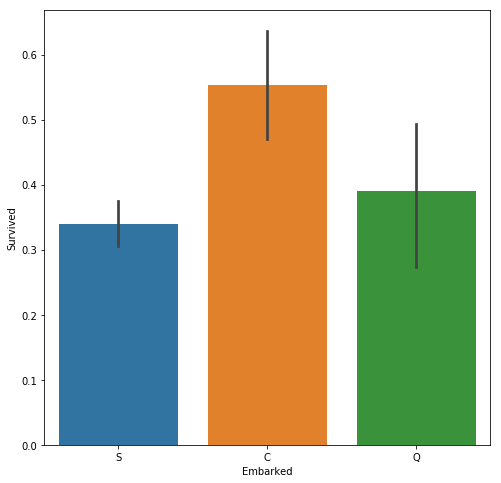

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(x="Embarked", y="Survived", data=train_df)
plt.show()

Same as before we have here an ordinal feature. The order is as follow: C > Q > S.

In [22]:
for dataset in (train_df, test_df):
    dataset["Sex_code"] = dataset["Sex"].map({"male": 0, "female":1})
    dataset["Embarked_code"] = dataset["Embarked"].map({"C": 0, "Q": 1, "S": 2})
    dataset["Title_code"] = dataset["Title"].map({"Master": 0, "Miss": 1, "Mlle":2, "Mme": 3, "Mr": 4, "Mrs": 5, "Ms":6, "Rare": 7})

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Sex_code,Embarked_code,Title_code
0,0,3,male,22,1,0,7.2500,S,Mr,1,0,2,4
1,1,1,female,38,1,0,71.2833,C,Mrs,1,1,0,5
2,1,3,female,26,0,0,7.9250,S,Miss,0,1,2,1
3,1,1,female,35,1,0,53.1000,S,Mrs,1,1,2,5
4,0,3,male,35,0,0,8.0500,S,Mr,0,0,2,4


## 4. Most Important Feature<a id="corr"></a>

I like to display the correlation matrix to see what are the links between the features we now have.

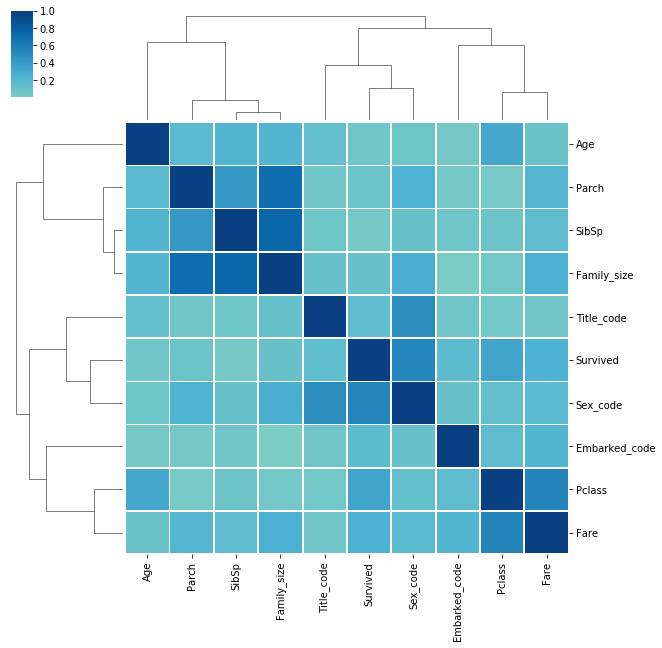

In [24]:
CorrelationMat=train_df.corr().abs()
cm=sns.clustermap(CorrelationMat, center=0, cmap="GnBu",
               linewidths=.75, figsize=(10, 10), metric="correlation")
plt.show()

In [25]:
display(CorrelationMat.loc["Survived"].sort_values(ascending=False))

Survived         1.000000
Sex_code         0.543351
Pclass           0.338481
Fare             0.257307
Embarked_code    0.167675
Title_code       0.150866
Family_size      0.108631
Parch            0.081629
Age              0.055995
SibSp            0.035322
Name: Survived, dtype: float64

<p style="text-align:justify;">Interestingly enough we can see that the sex of the passenger is indeed very correlated to survival. But right after that comes the passenger class and fare. The Age only comes at the penultimate rank. I expected the age of the passenger to have a greater impact on the chances of survival. Let's modify this feature a little bit to see if we can use it in a better way.</p>

<p style="text-align:justify;">Also it is great to notice that the Title plays an important role and that the feature we created: Family_size has 10% of correlation with the Survived feature. The efforts invested in engineering these features paid.</p>

# III - Decision Tree Algorithm <a id="decision_tree"></a>

## 1. Last Cleaning<a id="cleaning"></a>

Before applying any algorithm, let's drop the remaining object features

In [26]:
obj_features = set([col for col in train_df.columns if train_df[col].dtype == "object"])
for feature in obj_features:
    train_df.drop(feature, axis=1, inplace=True)
    test_df.drop(feature, axis=1, inplace=True)
    print("The {} feature was dropped.".format(feature))

The Sex feature was dropped.
The Title feature was dropped.
The Embarked feature was dropped.


In [27]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_code,Embarked_code,Title_code
0,0,3,22,1,0,7.2500,1,0,2,4
1,1,1,38,1,0,71.2833,1,1,0,5
2,1,3,26,0,0,7.9250,0,1,2,1
3,1,1,35,1,0,53.1000,1,1,2,5
4,0,3,35,0,0,8.0500,0,0,2,4


## 2. Split Train/Test<a id="split"></a>

I first import the scikit-learn library which will help me perform the training. Then I use the same library to split the dataset into 20% test and 80% training.

In [41]:
import graphviz
from sklearn import tree
from sklearn import model_selection

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [42]:
labels = train_df.Survived
features = train_df.drop(["Survived"], axis=1)

In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state=42)

In [44]:
print("{} is the initial feature shape\n".format(features.shape))
print("{} is the training shape".format(X_train.shape))
print("{} is the test shape".format(X_test.shape))

(891, 9) is the initial feature shape

(712, 9) is the training shape
(179, 9) is the test shape


## 3. First Rough Model<a id="first_model"></a>

For this first rough model, I let scikit decide of the three without providing any parameter.

In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [46]:
test_prediction = clf.predict(X_test)
test_accuracy = sum(test_prediction == y_test.values)/len(test_prediction)*100

train_prediction = clf.predict(X_train)
train_accuracy = sum(train_prediction == y_train.values)/len(train_prediction)*100

print("Train accuracy: {:.2f}%".format(train_accuracy))
print("Test accuracy: {:.2f}%".format(test_accuracy))
print("Bias: {:.2f}".format(train_accuracy-test_accuracy))

Train accuracy: 98.88%
Test accuracy: 79.89%
Bias: 18.99


<p style="text-align:justify;">As we can see we have a huge bias after testing our training. This mean that we overfitted the training dataset. Thus we will not perform very well if we try to submit a test prediction with this algorithm. I display the decision graph below to see how it looks. The algorithm clearly tries to find impossible correlations.<br> We need to improve the algorithm.</p>

In [47]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features.columns.values,  
                         class_names=["Died", "Survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  

<img src="images/first_tree.png">

## 4. Tuning the Algorithm<a id="tuning"></a>

There are two arguments that we can tweak to get better result in our learning using scikit-learn.

<ul style="text-align:justify;">
    <li><b>max_depth:</b> The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.</li>
    <li><b>min_samples_leaf:</b> The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.</li>
</ul>

Train accuracy: 98.88%
Test accuracy: 58.66%
Bias: 40.22


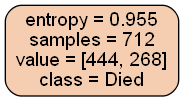

In [64]:
#for max_d in range(1,50):

#for min_s in range()
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=0.5)
clf_entropy.fit(X_train, y_train)

test_prediction = clf_entropy.predict(X_test)
test_accuracy = sum(test_prediction == y_test.values)/len(test_prediction)*100

train_prediction = clf.predict(X_train)
train_accuracy = sum(train_prediction == y_train.values)/len(train_prediction)*100

#print("\n{}".format(max_d))
print("Train accuracy: {:.2f}%".format(train_accuracy))
print("Test accuracy: {:.2f}%".format(test_accuracy))
print("Bias: {:.2f}".format(train_accuracy-test_accuracy))


dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                         feature_names=features.columns.values,  
                         class_names=["Died", "Survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

# IV - Conclusion<a id="conclusion"></a>